In [1]:
%pylab inline
import numpy as np
import EXPtools as expt
import pyEXP

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pyEXP.util.getVersionInfo()


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% This is EXP 7.7.21 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% Repository URL | https://mdweinberg@bitbucket.org/mdweinberg/exp.git     %
%%%%% Current branch | devel                                                   %
%%%%% Current commit | 8f049cd99d124259ef71c17416c6c07772f89ae7                %
%%%%% Compile time   | 2023-11-07 15:47:58 UTC                                 %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



In [3]:
np.__version__

'1.23.5'

In [4]:
# Generate triaxial halo distribution 

In [52]:
npart = int(1e5)
rs = 1 # Hernquist scale length 
axis_ratios = [0.3, 0.3, 0.9] # Axis ratios of princial axis
Hern_halo = expt.utils.halo.ICHernquist(npart)

In [86]:
hern_tri = Hern_halo.triaxial(axis_ratios, rot_angle=25, rot_axis='x')

(-4.0, 4.0)

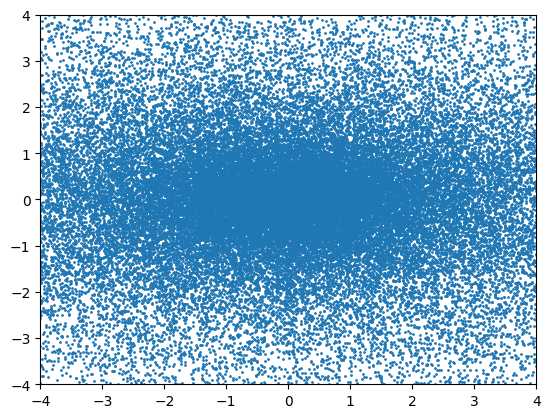

In [87]:
plt.scatter(hern_tri[:,0], hern_tri[:,2], s=1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

In [88]:
!rm .slgrid_herntri_cache.h5
!rm htri_dens_table.txt

In [89]:
basis, coefs = expt.basis_builder.makebasis(hern_tri, np.ones(npart), basis_model='Hernquist',
                                            rmax=8, nmax=10, modelname='htri_dens_table.txt',
                                            cachename='.slgrid_herntri_cache')

-> File model not found so we are computing one 

-> Computing analytical Hernquist model
! Scaling:  R= 7.999999999999999   M= 100000.0
0.9999999999999999 24615.109935380133 24615.109935380133 24615.109935380133
-> Model computed: rmin=0.6099999999999999, rmax=7.999999999999998, numr=501
No config file provided.
Computing empirical density
---- SLGridSph::WriteH5Cache: wrote <.slgrid_herntri_cache.h5>
------------------------------------------------------------
Cache parameters for SLGridSph: .slgrid_herntri_cache
------------------------------------------------------------
model               : htri_dens_table.txt
lmax                : 4
nmax                : 10
numr                : 501
cmap                : 1
rmin                : 0.60999999999999999
rmax                : 7.9199999999999982
scale               : 1
diverge             : 0
dfac                : 1
------------------------------------------------------------


---- SLGridSph::ReadH5Cache: error opening as HDF5 basis cache
HDF5-DIAG: Error detected in HDF5 (1.10.8) thread 0:
  #000: /dev/shm/nix-build-hdf5-1.10.8.drv-0/nixbld4/spack-stage-hdf5-1.10.8-4llfcdl4yg928lkan2xaxn0m9g0h5sfk/spack-src/src/H5A.c line 271 in H5Acreate2(): unable to create attribute
    major: Attribute
    minor: Unable to initialize object
  #001: /dev/shm/nix-build-hdf5-1.10.8.drv-0/nixbld4/spack-stage-hdf5-1.10.8-4llfcdl4yg928lkan2xaxn0m9g0h5sfk/spack-src/src/H5Aint.c line 156 in H5A__create(): attribute already exists
    major: Attribute
    minor: Object already exists
Unable to create the attribute "geometry": (Attribute) Object already exists


In [90]:
R, D, M, P = np.loadtxt('htri_dens_table.txt', skiprows=3, unpack=True)

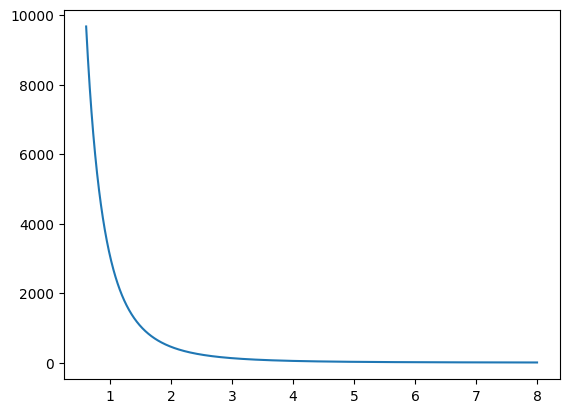

In [91]:
plt.plot(R, D)

In [92]:
sph_fields = expt.visuals.spherical_slice(basis, coefs, gridspecs={"theta_bins": 100, "phi_bins" : 50 }, rgrid=2)

In [93]:
xx = np.zeros((50, 100))

In [94]:
rho_field = sph_fields[0]
rho0_field = sph_fields[1]

grid = sph_fields[-1]

In [95]:
sph_fields[1].shape

(50, 100)

In [97]:
b = grid[0]
l = grid[1]


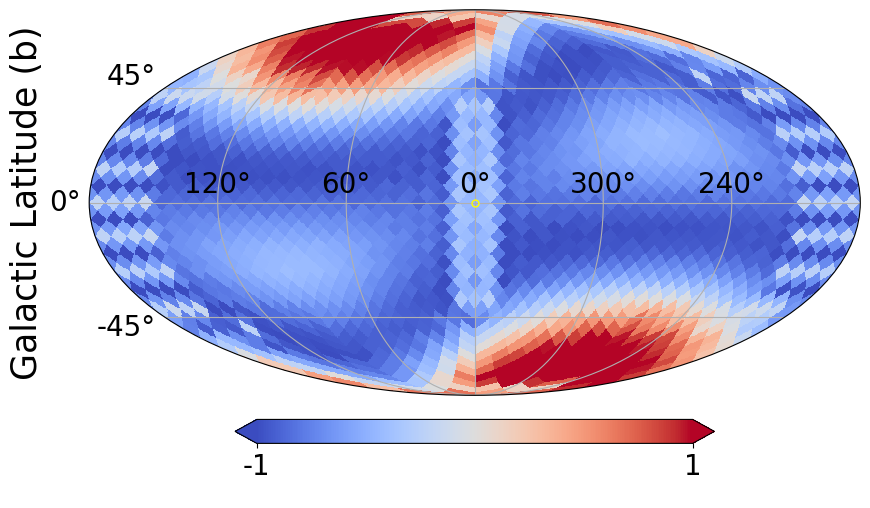

In [98]:
expt.visuals.projections.mollweide(l.flatten()*180/np.pi, b.flatten()*180/np.pi, q = rho_field.flatten()/rho0_field.flatten(),
                                   bmin=-1, bmax=1, l2=0, b2=0, nside=12, cmap='coolwarm')